___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [6]:
ad_data = pd.read_csv('advertising.csv')

In [7]:
ad_data.head()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


**Check the head of ad_data**

** Use info and describe() on ad_data**

In [8]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [9]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

<Axes: ylabel='Frequency'>

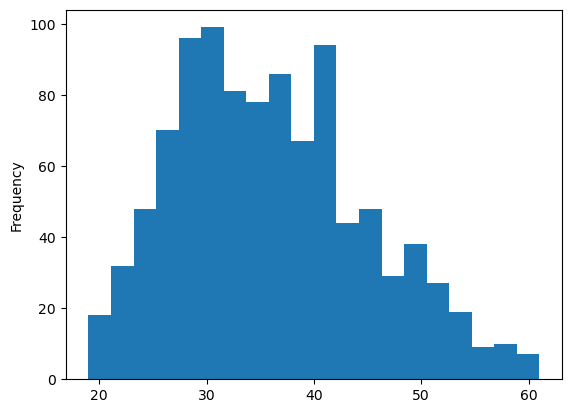

In [10]:
ad_data['Age'].plot.hist(bins=20)

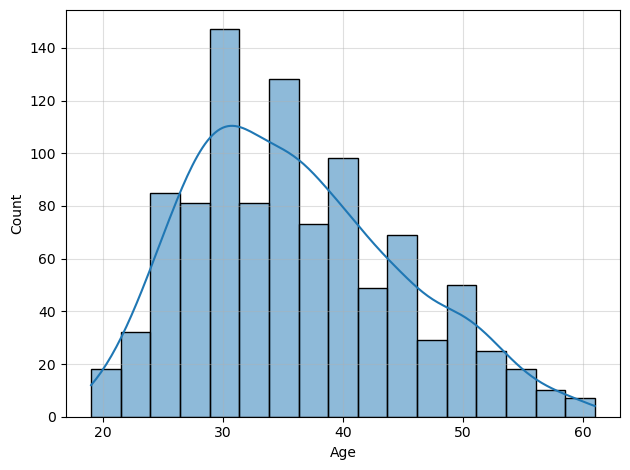

In [11]:
sns.histplot(data=ad_data,x='Age', kde=True)
plt.grid(alpha=0.4)
plt.tight_layout()

**Create a jointplot showing Area Income versus Age.**

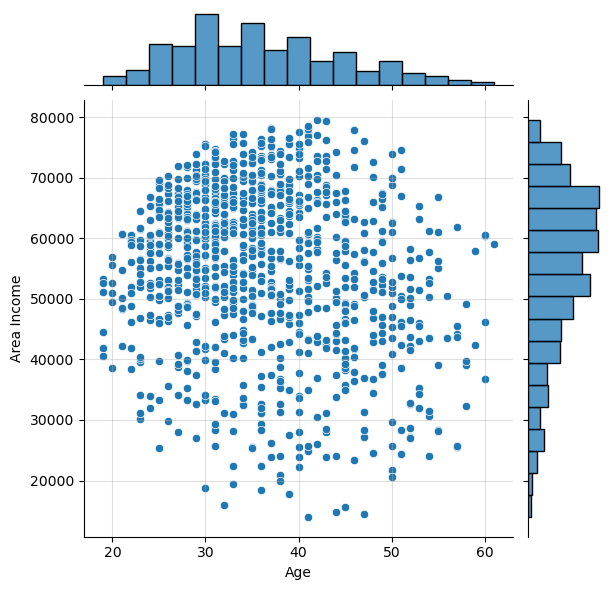

In [12]:
sns.jointplot(data=ad_data, x='Age', y='Area Income')
plt.grid(alpha=0.4)

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

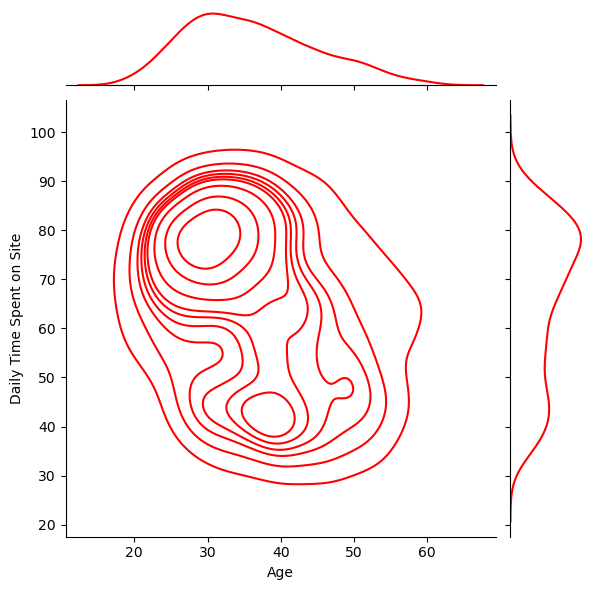

In [13]:
fig = plt.Figure()
sns.jointplot(data=ad_data, x='Age', y='Daily Time Spent on Site', kind='kde', palette='viridis', color='red')
fig.set_facecolor('none')
plt.show(fig)

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

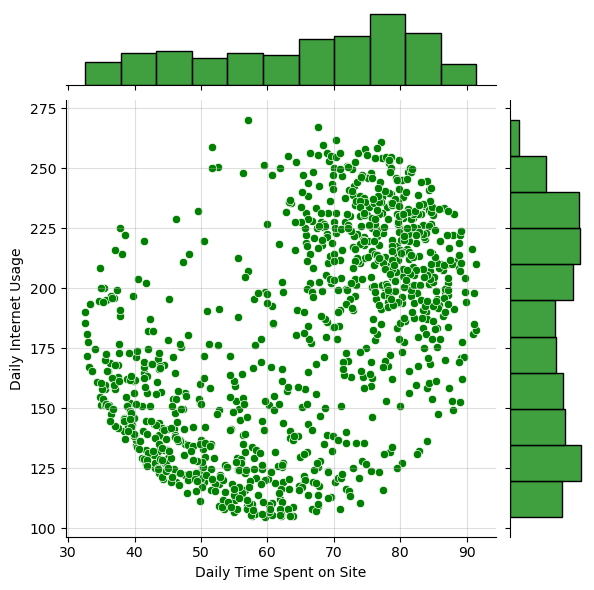

In [14]:
sns.jointplot(data=ad_data, x='Daily Time Spent on Site', y='Daily Internet Usage', color='green')
plt.grid(alpha=0.4)

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

/Users/macbookair/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_8173/3794557941.py:4: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()
/tmp/ipykernel_8173/3794557941.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


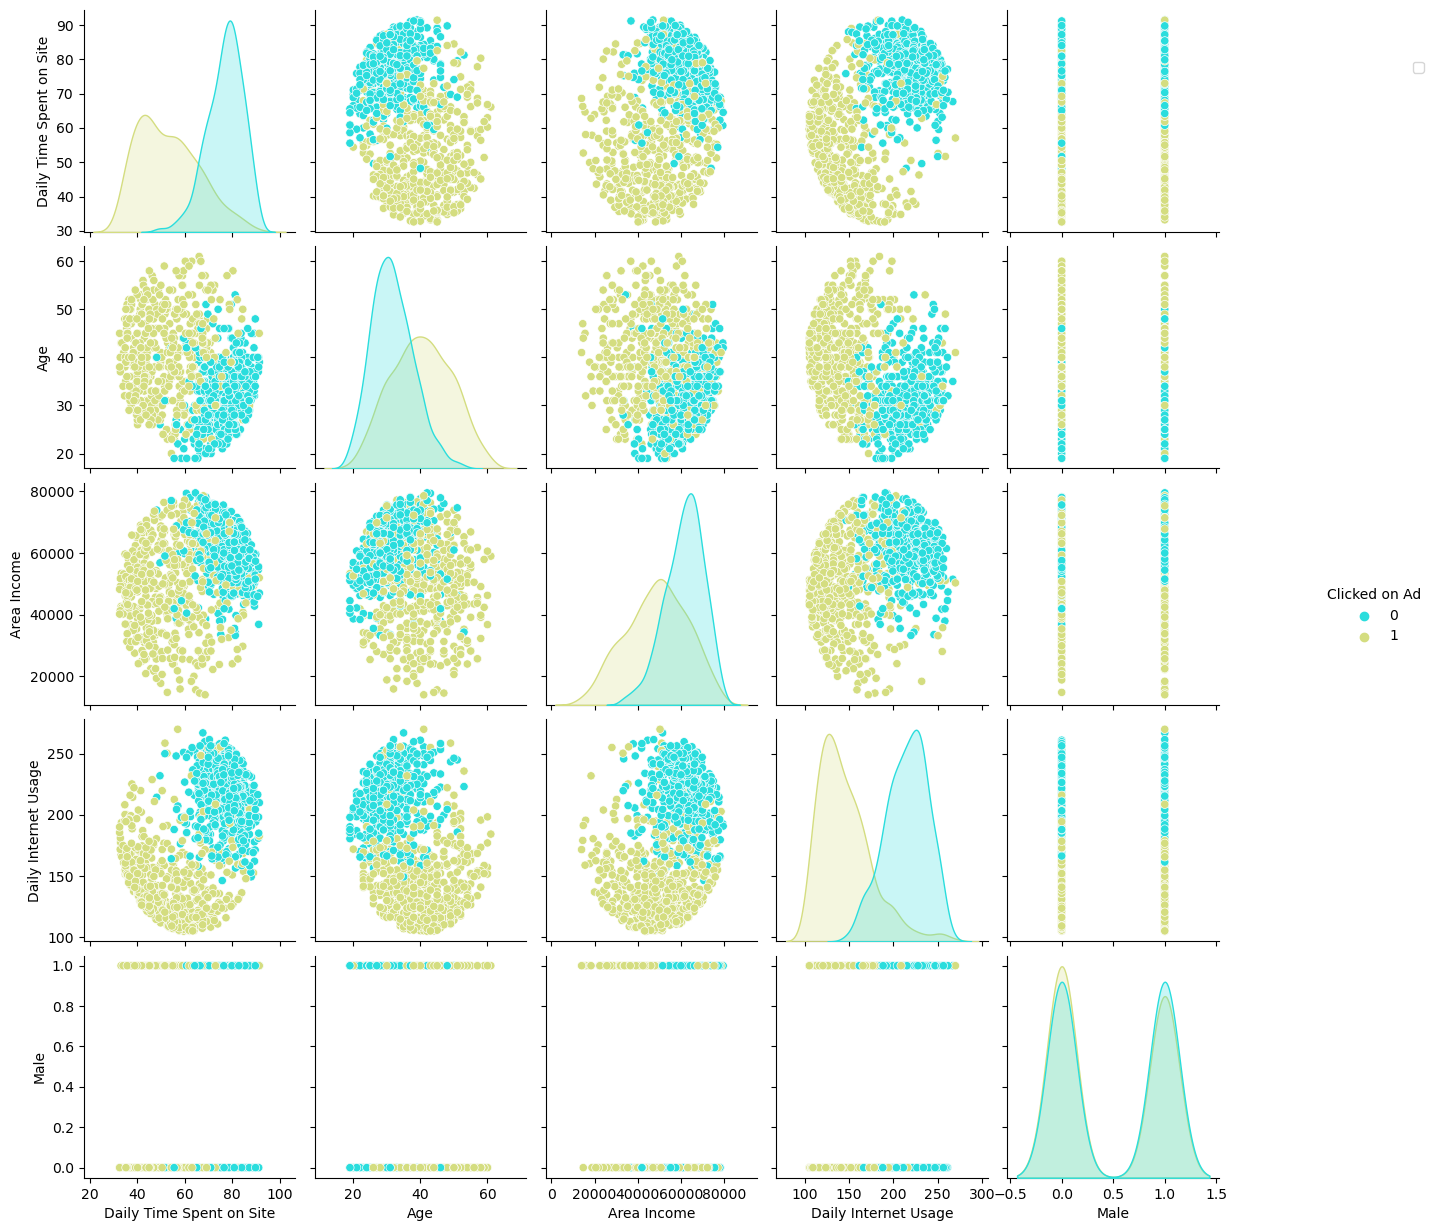

In [15]:
sns.pairplot(ad_data, hue='Clicked on Ad', palette='rainbow')
plt.grid(alpha=0.4)
plt.legend(loc='center right', bbox_to_anchor=(2, 5))
plt.tight_layout()

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [16]:
from sklearn.model_selection import train_test_split


In [17]:
ad_data.columns


Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [18]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [19]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male']]

In [20]:
X.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0


In [21]:
y = ad_data['Clicked on Ad']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=0.3, random_state=101)

** Train and fit a logistic regression model on the training set.**

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log = LogisticRegression()

In [25]:
log

LogisticRegression()

In [26]:
log.fit(X_train, y_train)

LogisticRegression()

## Predictions and Evaluations
** Now predict values for the testing data.**

In [27]:
predictions = log.predict(X_test)

** Create a classification report for the model.**

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
print(classification_report(y_test, predictions, output_dict=False))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



https://en.wikipedia.org/wiki/Precision_and_recall#:~:text=Precision%20can%20be%20seen%20as,irrelevant%20ones%20are%20also%20returned).

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

Precision can be seen as a measure of quality. Precision is a.k.a. Positive Predictive Value.
Recall as a measure of quantity. Recall is a.k.a. Sensitivity rate.

Higher Precision means that an algorithm returns more relevant results than irrelevant ones, 

High Recall means that an algorithm returns most of the relevant results (whether or not irrelevant ones are also returned).


print(classification_report(y_test, predictions, output_dict=True))

In [30]:
print(confusion_matrix(y_test, predictions))

[[149   8]
 [ 14 129]]


https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#:~:text=By%20definition%20a%20confusion%20matrix,positives%20is%20C%200%20%2C%201%20.

Confusion Matrix Explained

Compute confusion matrix to evaluate the accuracy of a classification.

Thus in binary classification, the count of 

Column 0: (for the Negatives)

True Negatives is C0,0

False Negatives is C1,0


Column 1: (for the Positives)

False Positives is C0,1

True Positives is C1,1




In [32]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print("tn: {}; fn: {}; fp: {}; tp: {}".format(tn, fn, fp, tp))

tn: 149; fn: 14; fp: 8; tp: 129


             precision    recall  f1-score   support

          0       0.87      0.96      0.91       162
          1       0.96      0.86      0.91       168

avg / total       0.91      0.91      0.91       330



## Great Job!